## 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [ ]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [ ]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [ ]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [ ]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [ ]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [ ]:
# 심슨의 역설을 확인할 국가 그룹 설정 및 새로운 데이터 프레임 생성
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
simpson_df = df[df['Country'].isin(country_group)]
simpson_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,12,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
...,...,...,...,...,...,...,...,...,...,...
524432,580553,20675,BLUE POLKADOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524433,580553,20676,RED RETROSPOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524434,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,2011-12-05 10:14:00,0.65,12646.0,USA,12,46.80
524435,580553,22083,PAPER CHAIN KIT RETROSPOT,12,2011-12-05 10:14:00,2.95,12646.0,USA,12,35.40


In [ ]:
simpson_df['Country'].unique()

array(['Japan', 'Hong Kong', 'Singapore', 'Lebanon', 'Canada', 'USA'],
      dtype=object)

In [ ]:
simpson_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 9783 to 524436
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     1202 non-null   category      
 1   StockCode     1202 non-null   category      
 2   Description   1202 non-null   category      
 3   Quantity      1202 non-null   int32         
 4   InvoiceDate   1202 non-null   datetime64[ns]
 5   UnitPrice     1202 non-null   float64       
 6   CustomerID    918 non-null    float32       
 7   Country       1202 non-null   object        
 8   InvoiceMonth  1202 non-null   int64         
 9   TotalPrice    1202 non-null   float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
# 전체 평균 총판매금액(TotalPrice)
TotalPrice_mean = simpson_df['TotalPrice'].mean()
TotalPrice_mean

69.32455074875207

In [ ]:
# 국가(Country)에 따른 총판매금액(TotalPrice)의 평균
simpson_df.groupby('Country')['TotalPrice'].mean()

Country
Canada        24.280662
Hong Kong     55.252817
Japan        116.561900
Lebanon       37.641778
Singapore     95.852658
USA           20.002179
Name: TotalPrice, dtype: float64

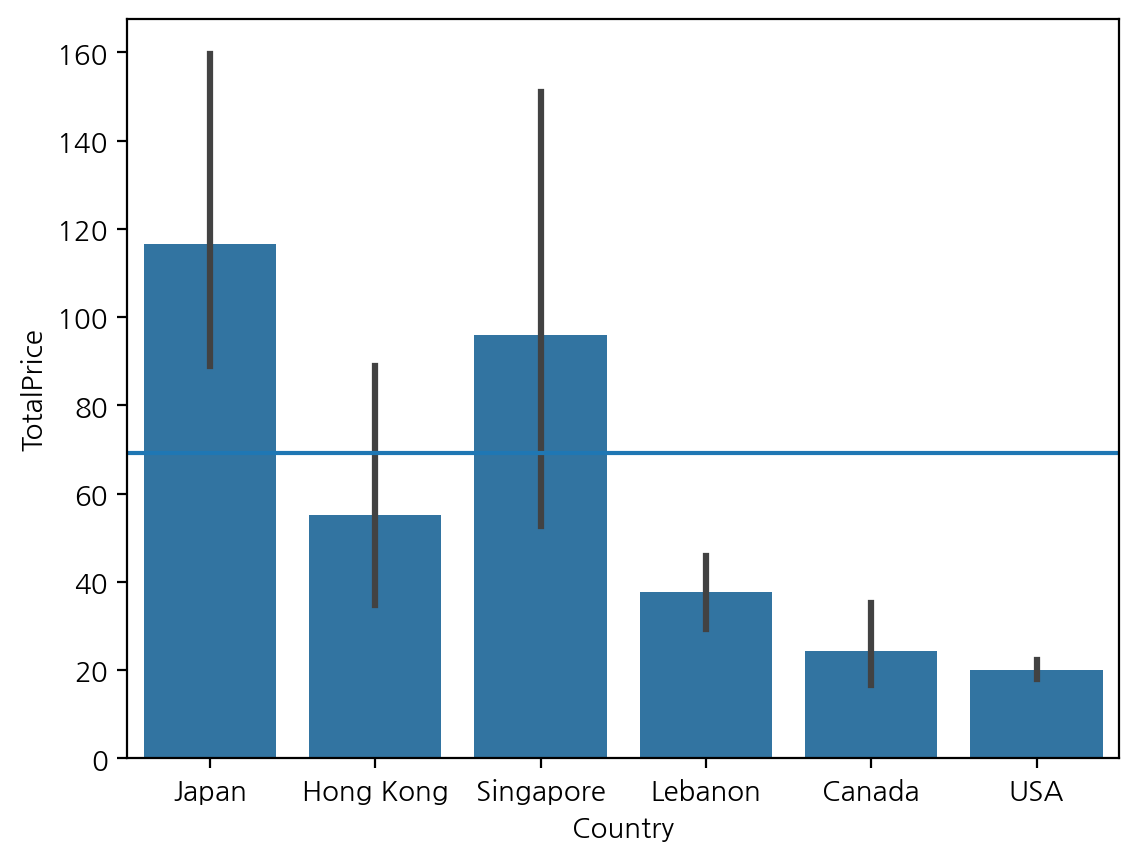

In [ ]:
# 국가별 평균 총판매금액 시각화
sns.barplot(data=simpson_df, x='Country', y='TotalPrice');
plt.axhline(TotalPrice_mean);

<Axes: xlabel='TotalPrice', ylabel='UnitPrice'>

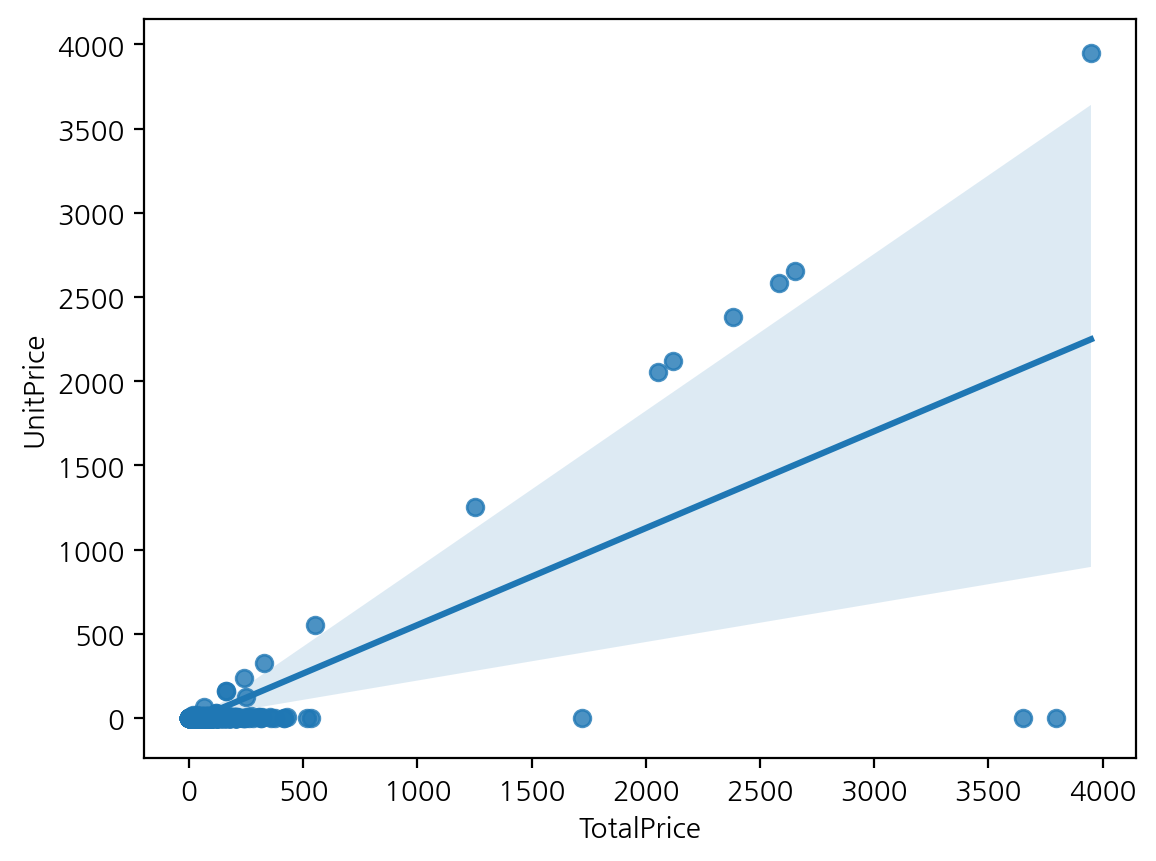

In [ ]:
# 전체 변수 시각화
sns.regplot(data=simpson_df, x='TotalPrice', y='UnitPrice')

In [ ]:
# 전체 변수와 개별 변수 합쳐서 시각화 하기
countries_all = simpson_df.copy()
countries_all['Country'] = 'all'
simpson_all = pd.concat([countries_all, simpson_df])
simpson_all['Country'].value_counts()

all          1202
Japan         321
Hong Kong     284
Singapore     222
USA           179
Canada        151
Lebanon        45
Name: Country, dtype: int64

In [ ]:
simpson_all.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,all,12,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,all,12,5.04
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,all,12,5.04
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,all,12,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,all,12,5.04


In [ ]:
simpson_all[simpson_all['Country']=='Hong Kong'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
69623,541975,22620,4 TRADITIONAL SPINNING TOPS,60,2011-01-24 14:24:00,1.25,NaN,Hong Kong,1,75.00
69624,541975,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,6,2011-01-24 14:24:00,3.75,NaN,Hong Kong,1,22.50
69625,541975,85183A,CHARLIE & LOLA WASTEPAPER BIN BLUE,6,2011-01-24 14:24:00,3.75,NaN,Hong Kong,1,22.50
69626,541975,16236,KITTY PENCIL ERASERS,28,2011-01-24 14:24:00,0.21,NaN,Hong Kong,1,5.88
69627,541975,21058,PARTY INVITES WOODLAND,12,2011-01-24 14:24:00,0.85,NaN,Hong Kong,1,10.20


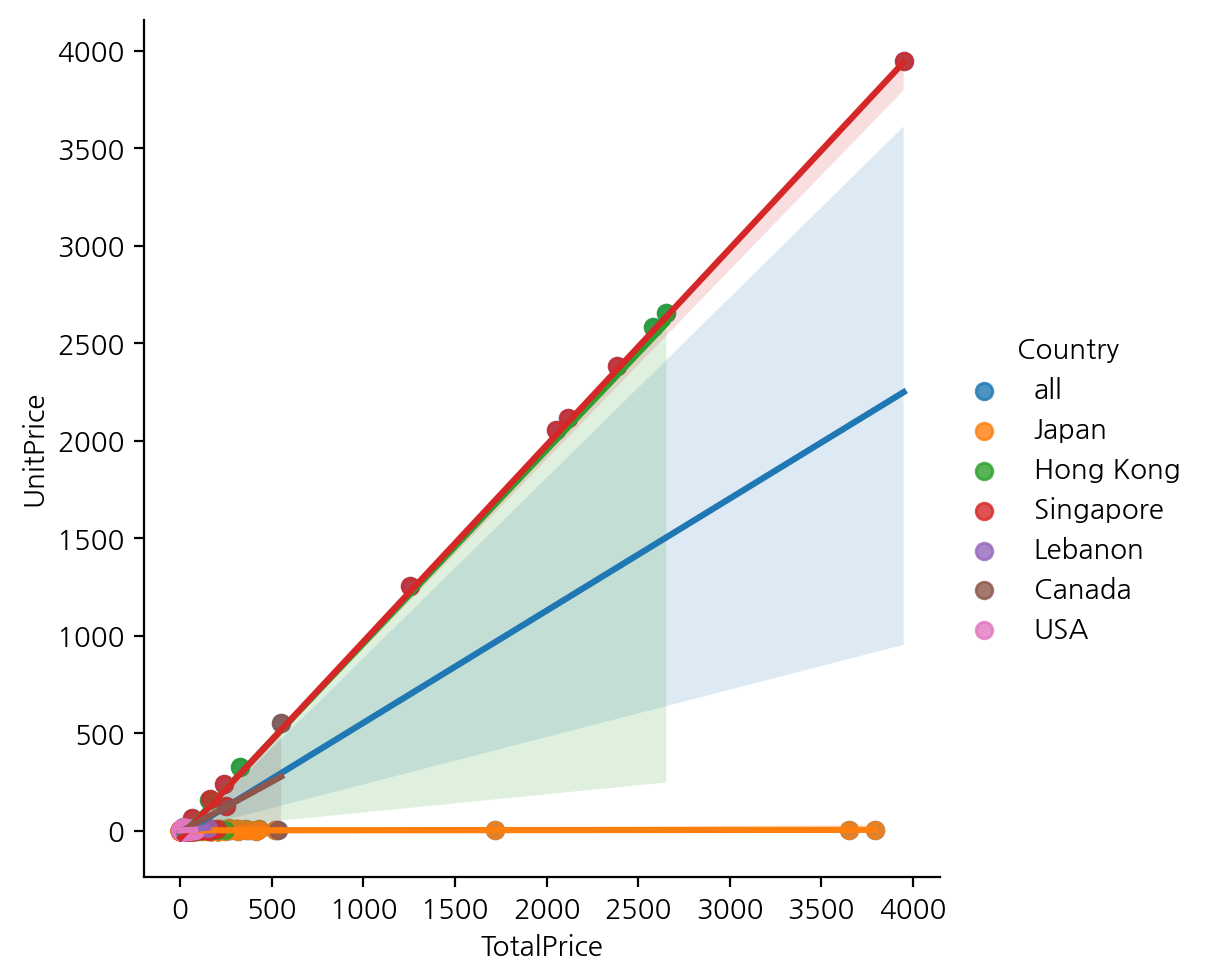

In [ ]:
# 개별 변수의 회귀선 시각화
sns.lmplot(data=simpson_all, x='TotalPrice', y='UnitPrice', hue='Country');

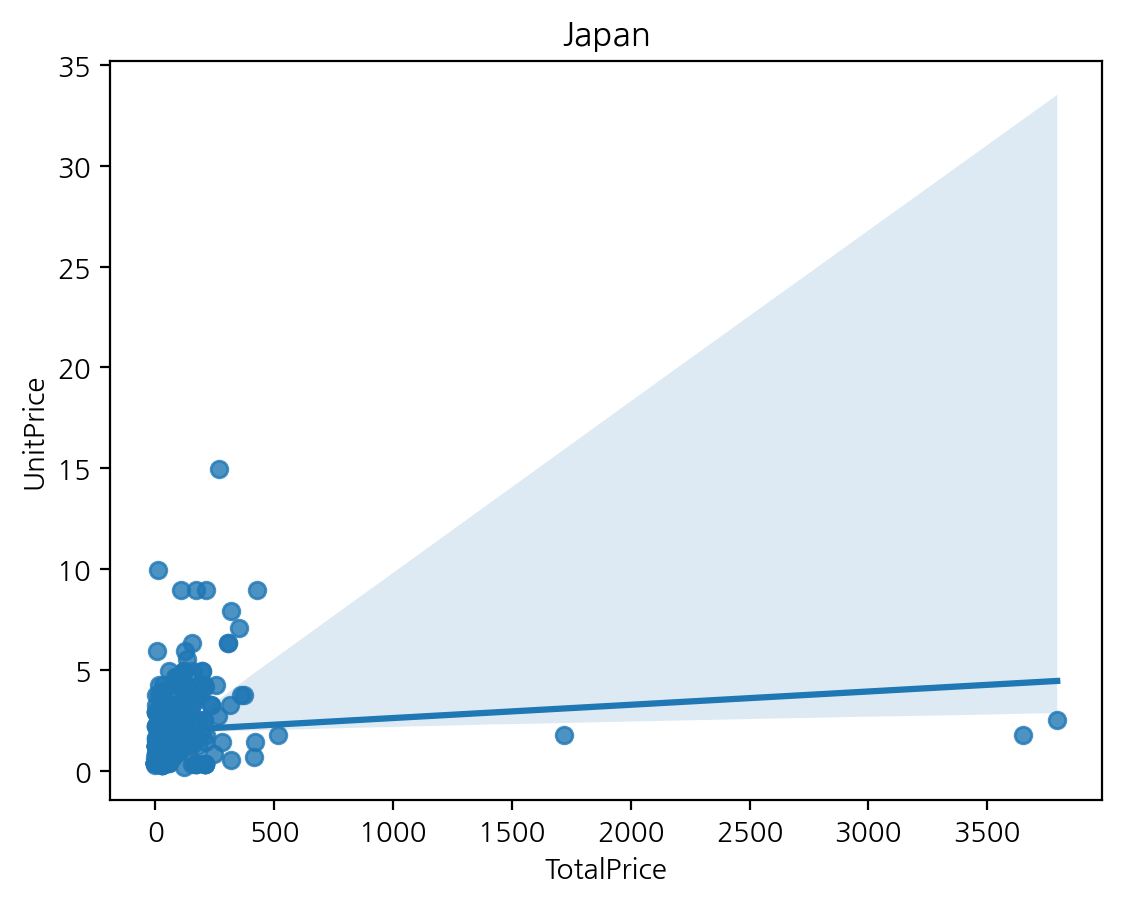

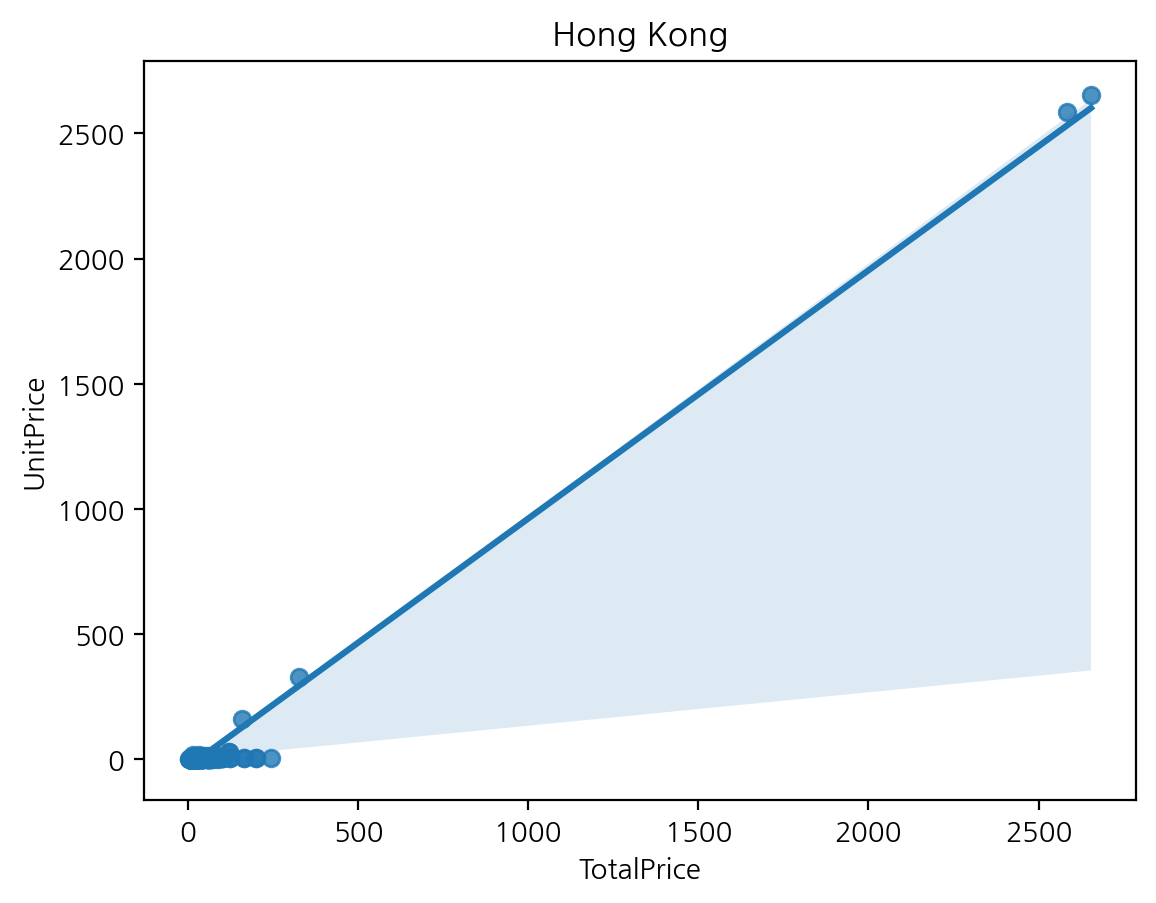

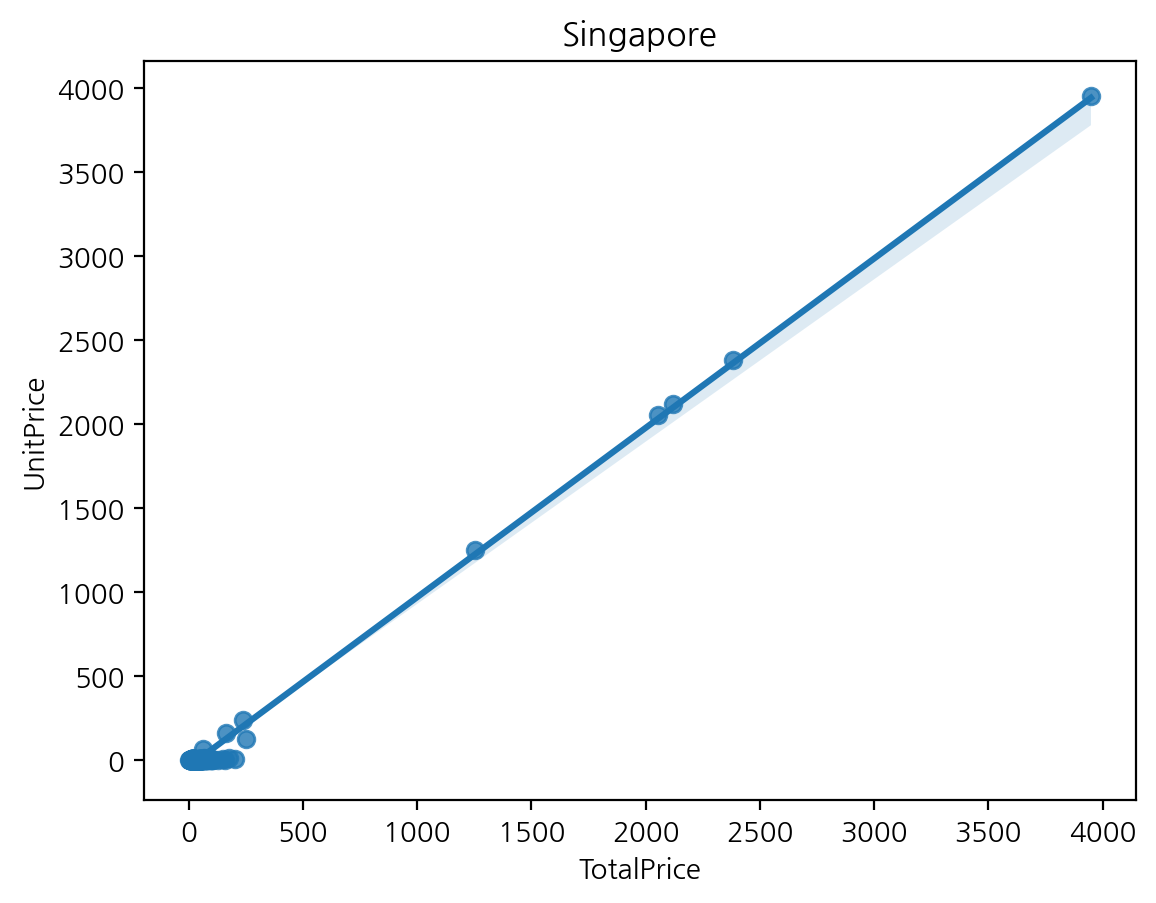

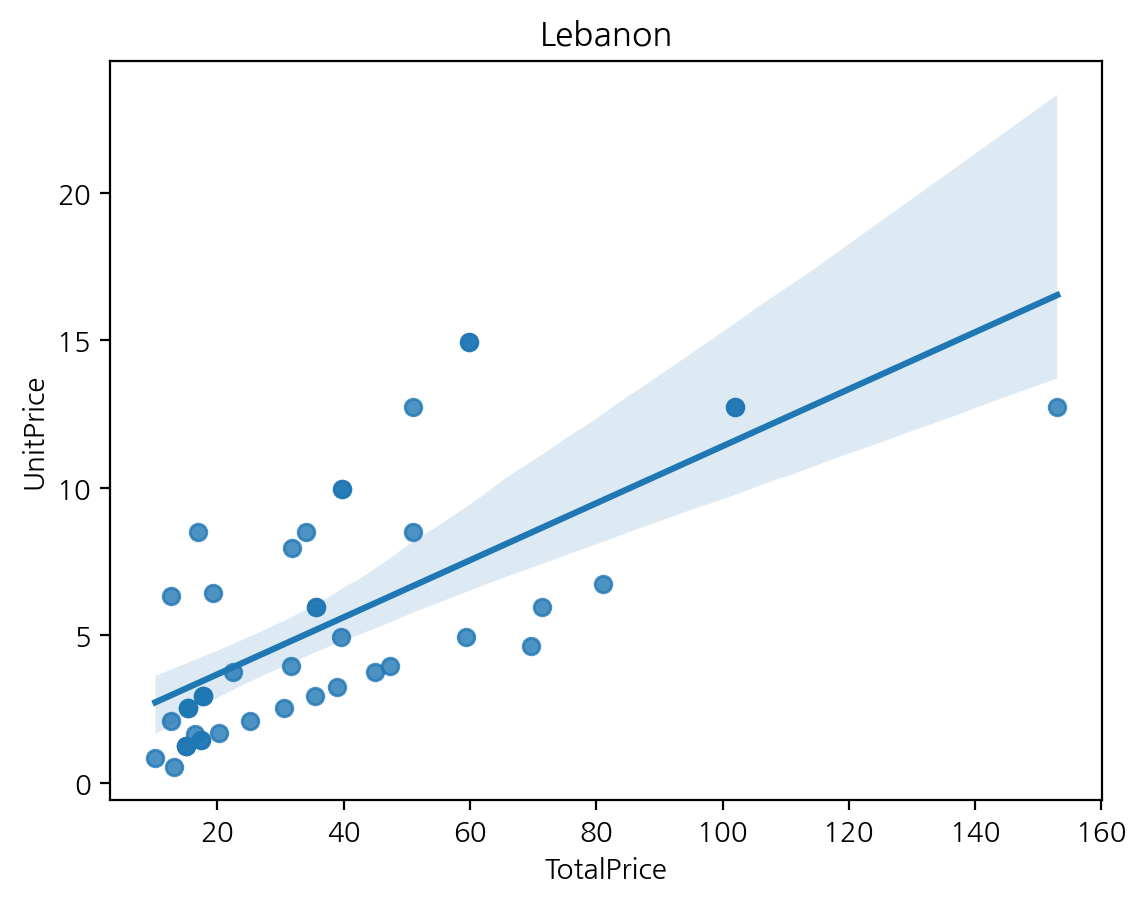

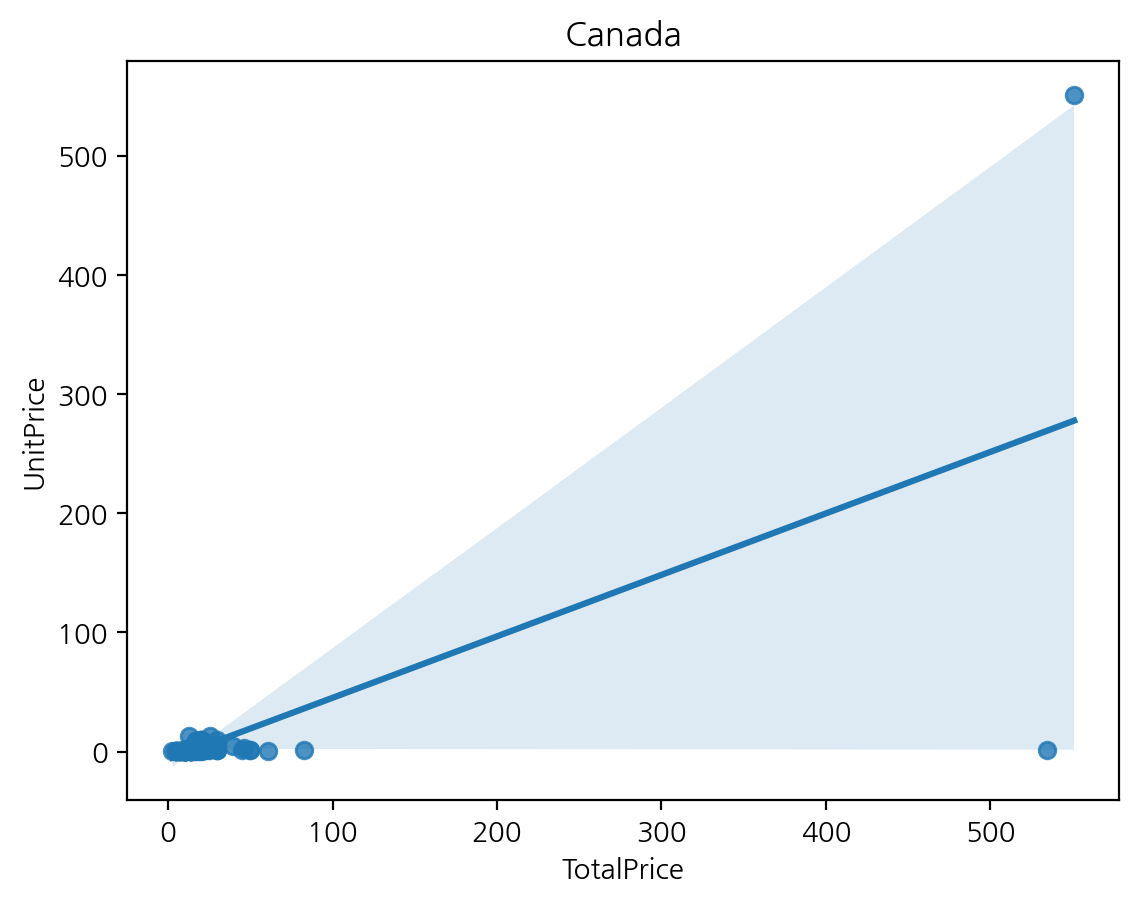

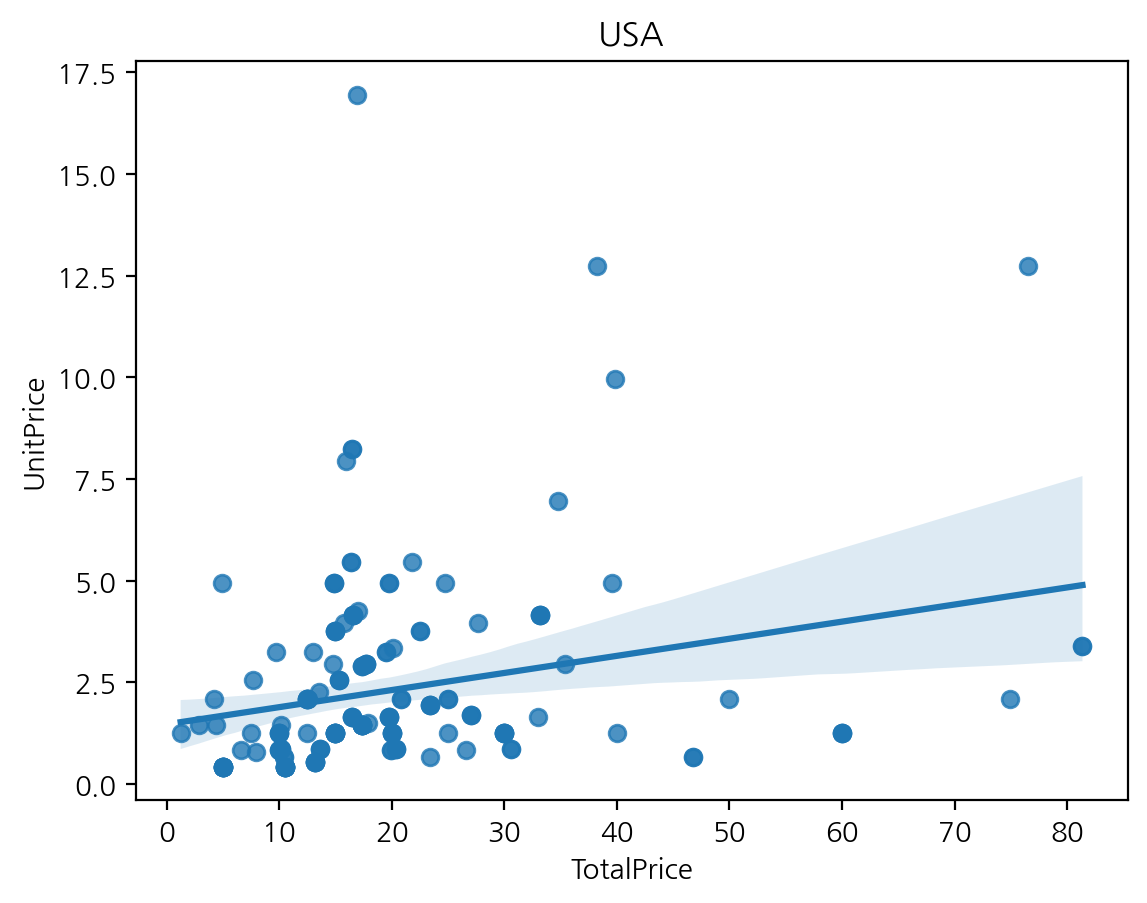

In [ ]:
for country in country_group:
  sns.regplot(data=simpson_all[simpson_all['Country']==country], x='TotalPrice', y='UnitPrice').set(title=country)
  plt.show()

### 미션1) 결과 분석
```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```
전체 데이터에 대한 UnitPrice와 TotalPrice의 회귀선과 국가별 UnitPrice와 TotalPrice의 회귀선이 모두 위로 향하는 모습이다.

-> 심슨의 역설이 없는 데이터이다.

어려웠던 점: 실습할 때와는 다르게 명확한 그래프가 나오지 않아 당황스러웠고, 제대로 한 게 맞는지 확신이 들지 않는다.


## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [ ]:
import statsmodels.api as sm
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X_ols = sm.add_constant(X) # 상수항 추가

In [ ]:
X.shape, y.shape, X_ols.shape

((530104,), (530104,), (530104, 2))

In [ ]:
# Statsmodels를 사용한 단순 회귀 모델 훈련
model_ols = sm.OLS(y, X_ols).fit()
model_ols

In [ ]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:45:55   Log-Likelihood:            -3.7156e+06
No. Observations:              530104   AIC:                         7.431e+06
Df Residuals:                  530102   BIC:                         7.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0802      0.370     43.463      0.0

### 미션2) 결과 분석

**1. 회귀계수**

  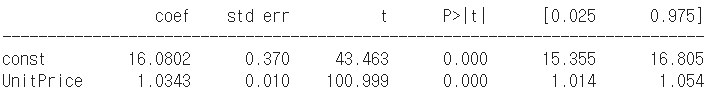

  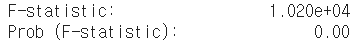

  상수항을 포함한 모든 회귀계수의 p-value가 0.05보다 작으므로 통계적으로 유의미함을 알 수 있다
  F-statistic은 1.090e+04이고 p-value는 0.00이므로 통계적으로 유의미하다

**2. 결정계수**

  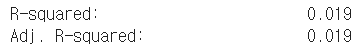

  결정계수와 조정된 결정계수가 0.019로 독립변수들이 종속변수의 변동을 1.9% 밖에 설명하지 못하기 때문에 잘 설명하고 있다고 보기 힘들다.

**3. 결과 전체 해석**
  
  결정계수가 낮아 회귀 분석 모델의 종속 변수의 변동성에 대한 설명력은 낮지만, 회귀계수들이 통계적으로 유의미하므로 TotalPrice를 UnitPrice로 추정할 수 있다

## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [ ]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [ ]:
df_promotion.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False


In [ ]:
df_promotion["InvoiceDay"] = df_promotion["InvoiceDate"].dt.day

In [ ]:
df_promotion.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,False,False,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,False,False,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False,1


### 크리스마스 시즌 기간(IsChristmasPeriod) 수정의 필요성
2010년 12월 25일부터 크리스마스 기간으로 설정했는데 IsChristmasPeriod가 True인 데이터는 존재하지 않는다

12월 중 크리스마스 시즌 상품 판매량 혹은 전체 판매량이 가장 많은 주를 프로모션 기간으로 설정하면 좋을 것 같다

In [ ]:
df_promotion[df_promotion["IsChristmasPeriod"]==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct,InvoiceDay


### 크리스마스 시즌 동안 '전체 거래량'과 '크리스마스 상품 거래량' 확인

In [ ]:
df_promotion[df_promotion["IsChristmasProduct"]==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 46 to 41537
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           1601 non-null   category      
 1   StockCode           1601 non-null   category      
 2   Description         1601 non-null   category      
 3   Quantity            1601 non-null   int32         
 4   InvoiceDate         1601 non-null   datetime64[ns]
 5   UnitPrice           1601 non-null   float64       
 6   CustomerID          1601 non-null   float32       
 7   Country             1601 non-null   object        
 8   InvoiceMonth        1601 non-null   int64         
 9   TotalPrice          1601 non-null   float64       
 10  IsChristmasPeriod   1601 non-null   bool          
 11  IsChristmasProduct  1601 non-null   bool          
 12  InvoiceDay          1601 non-null   int64         
dtypes: bool(2), category(3), datetime64[ns](1), fl

In [ ]:
daily_sales_count = df_promotion.groupby("InvoiceDay").size()
christmas_sales_count = df_promotion[df_promotion["IsChristmasProduct"]==True].groupby(["InvoiceDay"]).size()

avg_daily_sales_count = daily_sales_count.mean()
avg_christmas_sales_count = christmas_sales_count.mean()

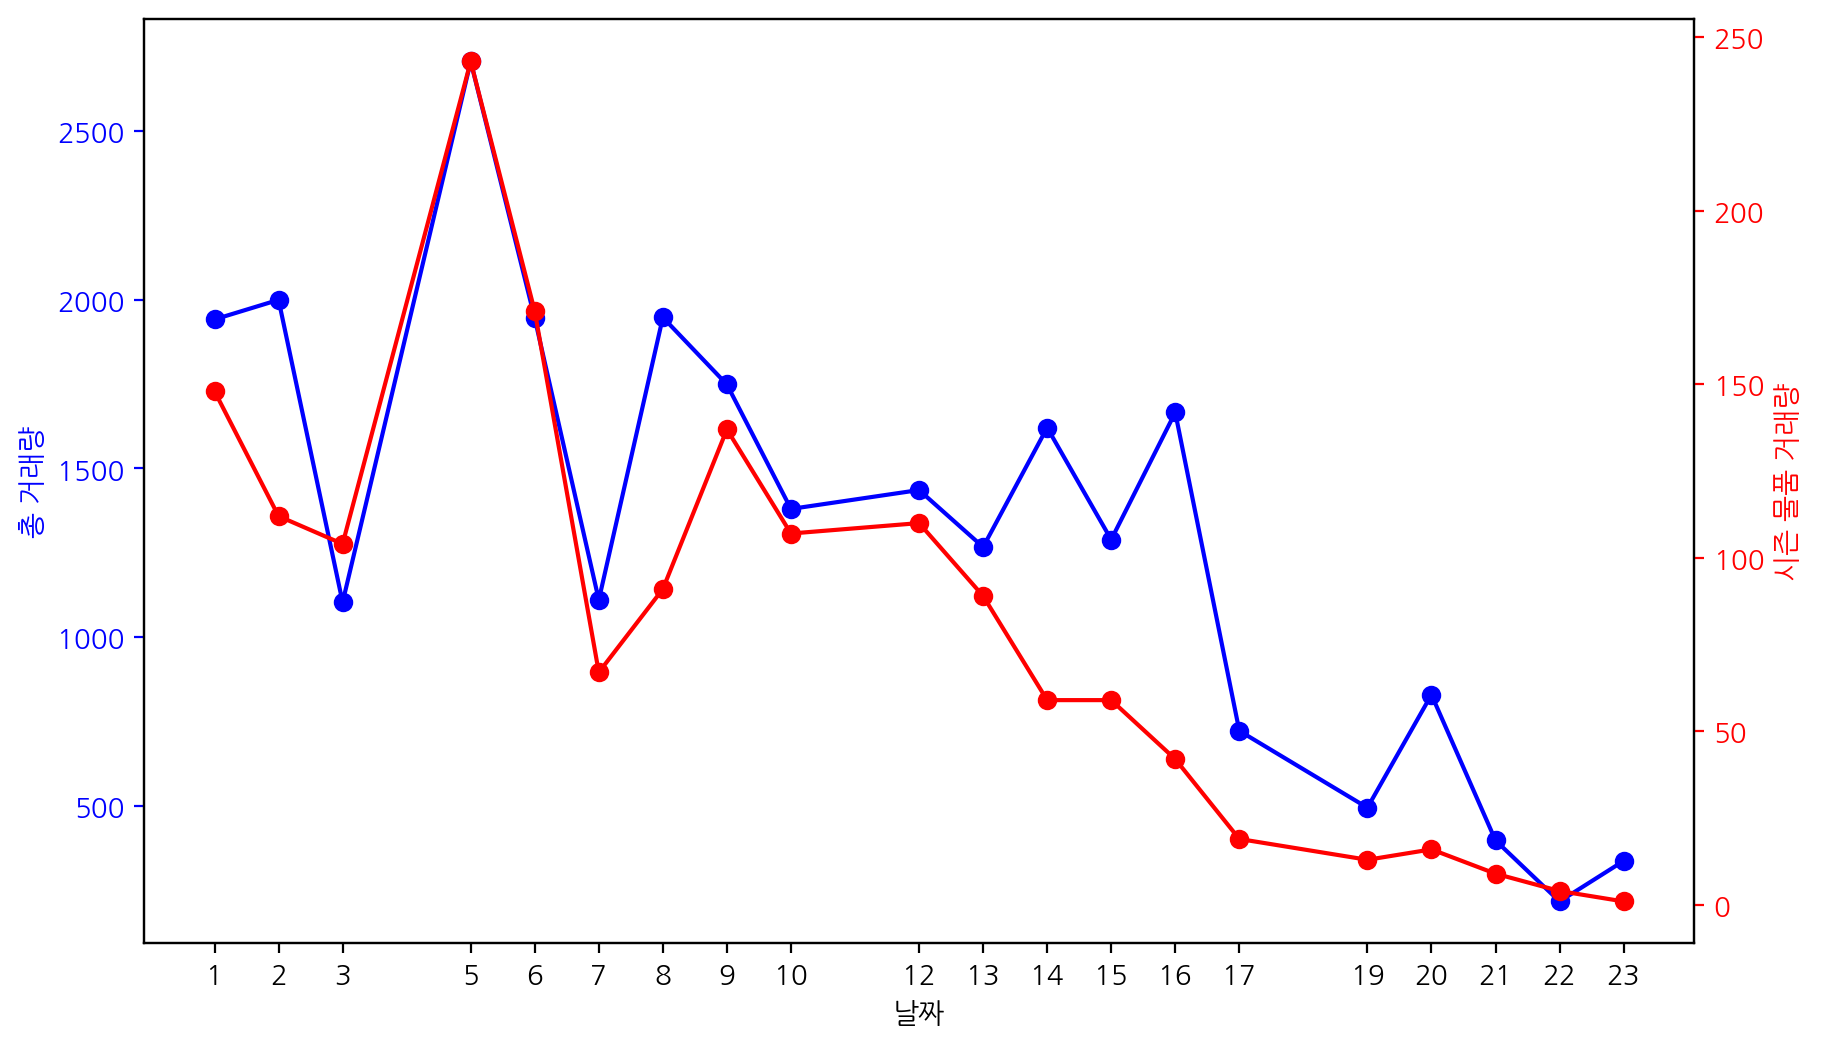

In [ ]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks(daily_sales_count.index)

# 총 거래량 선그래프
ax1.plot(daily_sales_count.index, daily_sales_count.values, color='b', marker='o')
ax1.set_xlabel('날짜')
ax1.set_ylabel('총 거래량', color='b')
ax1.tick_params('y', colors='b')

# 시즌 물품 거래량 선그래프
ax2 = ax1.twinx()
ax2.plot(christmas_sales_count.index, christmas_sales_count.values, color='r', marker='o')
ax2.set_ylabel('시즌 물품 거래량', color='r')
ax2.tick_params('y', colors='r')


### 크리스마스 시즌 동안 '전체 판매금액'과 '크리스마스 상품 판매금액' 확인

In [ ]:
daily_sales_price = df_promotion.groupby("InvoiceDay")['TotalPrice'].sum()
christmas_sales_price = df_promotion[df_promotion["IsChristmasProduct"]==True].groupby("InvoiceDay")['TotalPrice'].sum()

avg_daily_sales_price = daily_sales_price.mean()
avg_christmas_sales_price = christmas_sales_price.mean()

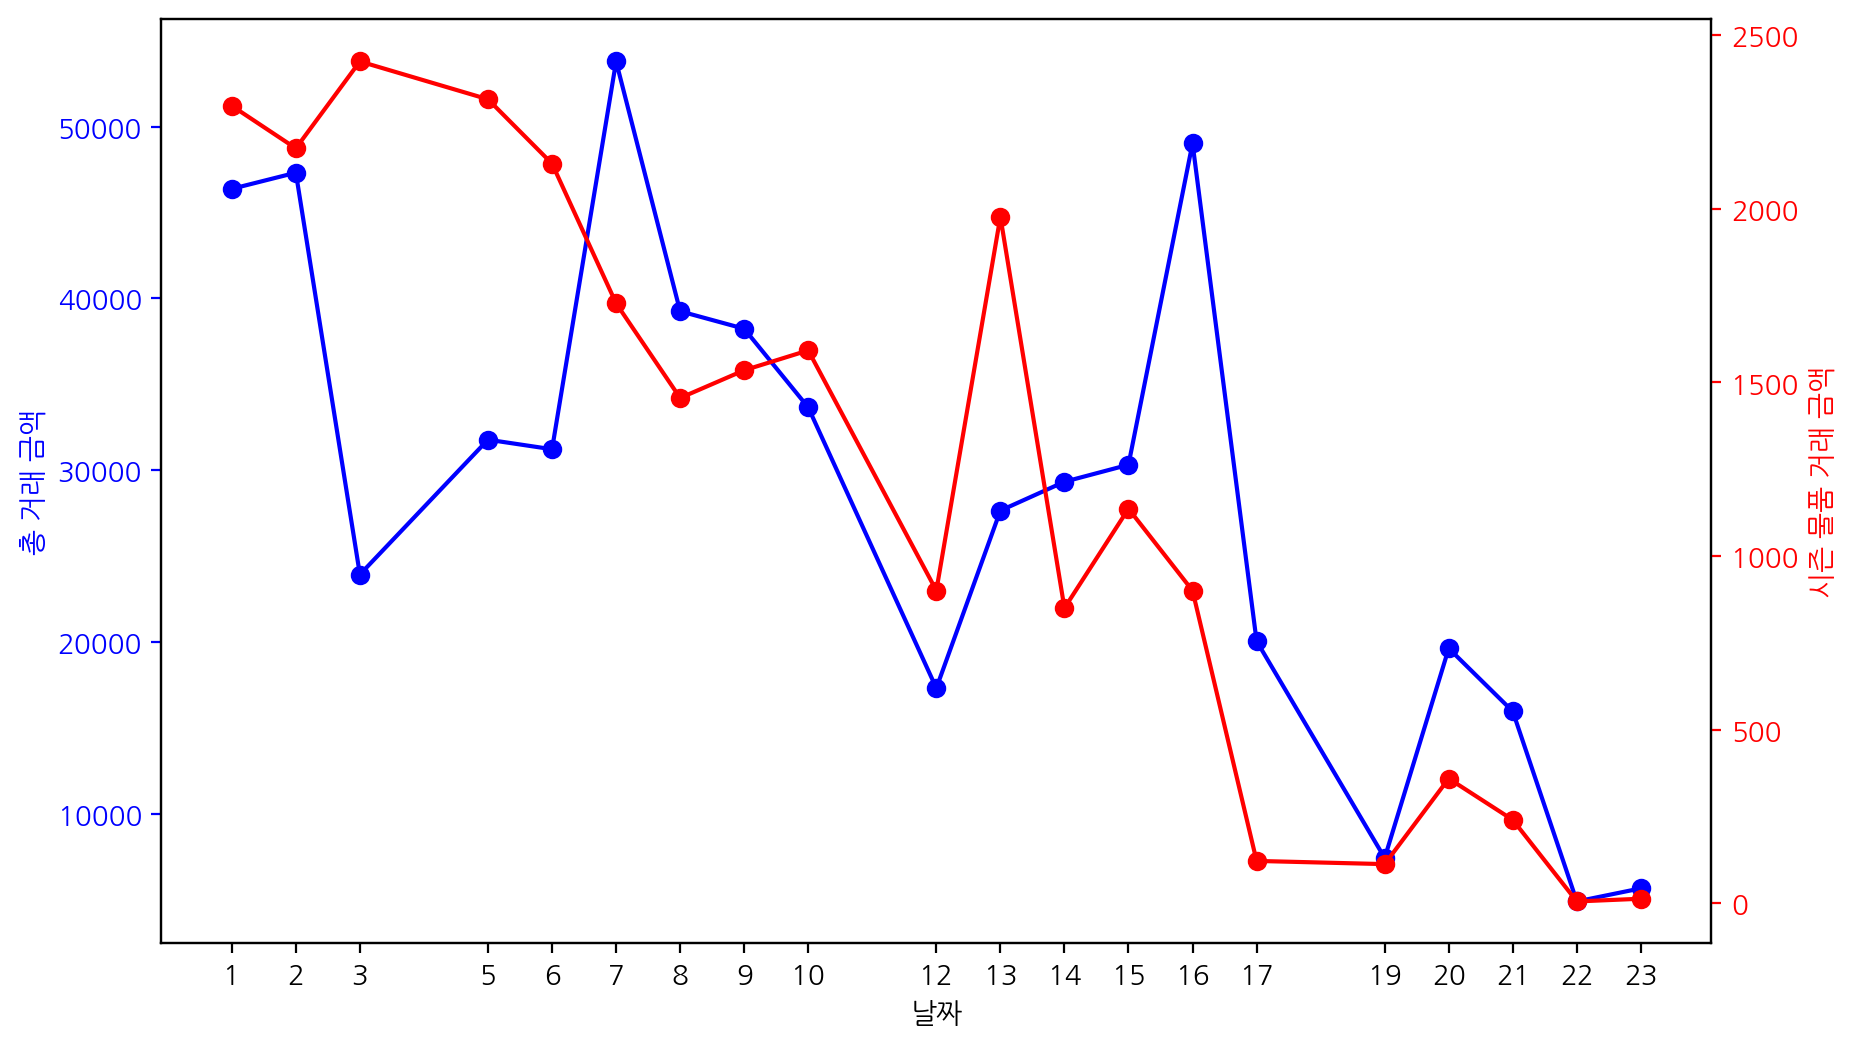

In [ ]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks(daily_sales_price.index)

# 총 거래량 선그래프
ax1.plot(daily_sales_price.index, daily_sales_price.values, color='b', marker='o')
ax1.set_xlabel('날짜')
ax1.set_ylabel('총 거래 금액', color='b')
ax1.tick_params('y', colors='b')

# 시즌 물품 거래량 선그래프
ax2 = ax1.twinx()
ax2.plot(christmas_sales_price.index, christmas_sales_price.values, color='r', marker='o')
ax2.set_ylabel('시즌 물품 거래 금액', color='r')
ax2.tick_params('y', colors='r')


1. 매우 미리 준비하는 사람들: 12월 5일 ~ 10일동안 구매 - 5일이 주말 부근, 거래량이 많고 그에 따라 구매금액이 높음
2. 미리 준비하는 사람들: 12월 13일 폭발적으로 구매 - 13일도 주말 부근, 거래량은 적으나 구매금액이 높음

**전략**
1. 구매 금액이 적은 날에 프로모션을 진행한다 - 거래량을 늘릴 수 있다
2. 구매 금액이 많은 날에 프로모션을 진행한다 - 구매금액을 늘릴 수 있다

**선택한 전략: 7일부터 12일까지 거래량은 비교적 많지만 구매금액이 적은 날에 프로모션을 진행한다.**


In [ ]:
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-07") & (df_promotion["InvoiceDate"] < "2010-12-13")
df_promotion[df_promotion["IsChristmasPeriod"]==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct,InvoiceDay
14024,537446,20782,CAMOUFLAGE EAR MUFF HEADPHONES,4,2010-12-07 09:13:00,5.49,18055.0,United Kingdom,12,21.96,True,False,7
14025,537446,21135,VICTORIAN METAL POSTCARD SPRING,8,2010-12-07 09:13:00,1.69,18055.0,United Kingdom,12,13.52,True,False,7
14026,537446,21175,GIN + TONIC DIET METAL SIGN,12,2010-12-07 09:13:00,2.10,18055.0,United Kingdom,12,25.20,True,False,7
14027,537446,21397,BLUE POLKADOT EGG CUP,12,2010-12-07 09:13:00,1.25,18055.0,United Kingdom,12,15.00,True,False,7
14028,537446,21411,GINGHAM HEART DOORSTOP RED,3,2010-12-07 09:13:00,4.25,18055.0,United Kingdom,12,12.75,True,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,538519,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1,2010-12-12 16:20:00,2.95,18037.0,United Kingdom,12,2.95,True,False,12
26725,538519,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,1,2010-12-12 16:20:00,2.55,18037.0,United Kingdom,12,2.55,True,False,12
26726,538519,22663,JUMBO BAG DOLLY GIRL DESIGN,1,2010-12-12 16:20:00,1.95,18037.0,United Kingdom,12,1.95,True,False,12
26727,538519,21931,JUMBO STORAGE BAG SUKI,1,2010-12-12 16:20:00,1.95,18037.0,United Kingdom,12,1.95,True,False,12


## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# 데이터 전처리
# 결측치 제거 또는 대체
df_promotion = df_promotion.dropna(subset=['Quantity', 'IsChristmasProduct', 'UnitPrice', 'Country'])

In [ ]:
# 다변량 회귀분석
# 독립변수: IsChristmasProduct, UnitPrice, Country | 종속변수: Quantity
formula = 'Quantity ~ IsChristmasProduct + UnitPrice + Country'
model_multi = smf.ols(formula=formula, data=df_promotion).fit()

In [ ]:
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     31.87
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          5.46e-138
Time:                        04:46:01   Log-Likelihood:            -1.3687e+05
No. Observations:               26157   AIC:                         2.738e+05
Df Residuals:                   26133   BIC:                         2.740e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### 미션4) 결과 분석

**1. 회귀계수**

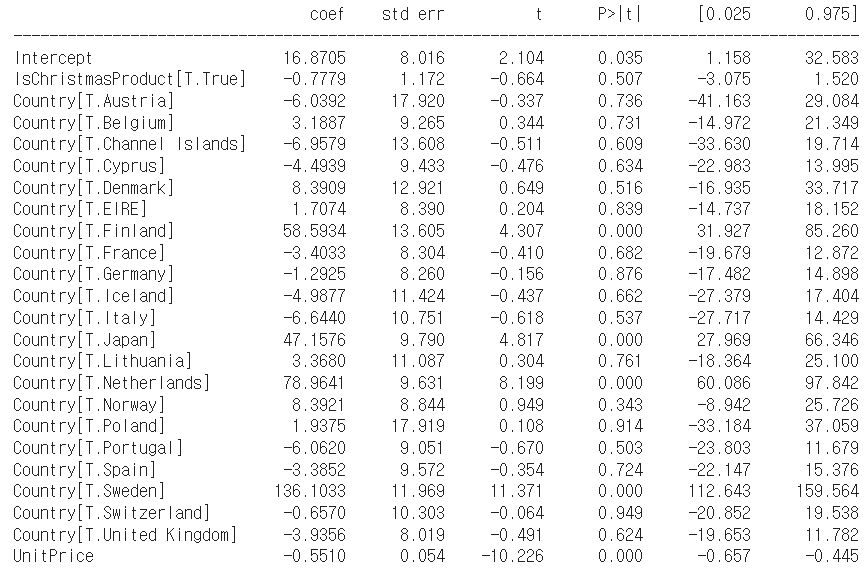

  회귀계수의 p-value
  - IsChristmasProduct: p-value가 0.507로 이 변수는 유의미하지 않다
  - Country: Sweden, Netherlands, Japan, Finland, Intrcept 항목을 제외하고는 0.05보다 크기 때문에 해당 국가를 제외하고는 통계적으로 유의미하지 않은 것 같다
  - UnitPrice: 미션2에서 알 수 있듯이 p-value가 0으로 매우 유의미한 변수이다

  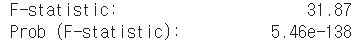

  F-statistic은 31.87이고 p-value는 5.46e-138이므로 모델 전체로 봤을 때는 통계적으로 유의미하다

**2. 결정계수**

  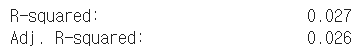

  결정계수가 0.027, 조정된 결정계수가 0.026로 독립변수들이 종속변수의 변동을 2.6% 밖에 설명하지 못하기 때문에 잘 설명하고 있다고 보기 힘들다.

**3. 결과 전체 해석**
  
  이 모델은 전체적으로 설명력이 낮고 일부 변수들이 통계적으로 유의미하지 않을 수 있다. 다양한 변수들을 고려하거나 데이터를 추가로 수집해 모델을 재구축하는 등의 접근이 필요하다

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

False    6720
True     2028
Name: Target, dtype: int64

In [ ]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([ True, False, False,  True,  True])

In [ ]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

       False       0.78      0.92      0.84      1353
        True       0.27      0.10      0.15       397

    accuracy                           0.73      1750
   macro avg       0.52      0.51      0.49      1750
weighted avg       0.66      0.73      0.68      1750



1. False Positive (FP): 실제로는 False인데 모델이 True로 예측한 경우 (397건 중에서 357건이 FP)

2. True Positive (TP): 실제로도 True이고 모델이 True로 예측한 경우 (1353건 중에서 1243건이 TP)

3. False Negative (FN): 실제로는 True인데 모델이 False로 예측한 경우 (397건 중에서 354건이 FN)

4. True Negative (TN): 실제로도 False이고 모델이 False로 예측한 경우 (1353건 중에서 1263건이 TN)

위 confusion matrix를 기반으로 한 precision, recall, f1-score, accuracy의 지표들은 다음과 같이 해석됩니다:

Precision (정밀도): 모델이 True로 예측한 경우 중에서 실제로 True인 비율. 여기서는 True로 예측한 경우가 많은 경우에 대해 정확도가 낮게 나왔습니다. Precision이 낮으면 False Positive가 많이 발생하는 것을 의미합니다.

Precision = TP / (TP + FP) = 1243 / (1243 + 357) = 0.776

Recall (재현율 또는 민감도): 실제로 True인 경우 중에서 모델이 True로 예측한 비율. 여기서는 실제로 True인 경우를 잘 예측하지 못하는 경향이 있습니다.

Recall = TP / (TP + FN) = 1243 / (1243 + 354) = 0.778

F1-Score: Precision과 Recall의 조화 평균으로, 두 지표 사이의 균형을 나타냅니다. 0과 1 사이의 값으로, 높을수록 모델의 성능이 좋다고 판단됩니다.

F1-Score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.776 * 0.778) / (0.776 + 0.778) = 0.777

Accuracy (정확도): 전체 샘플 중에서 올바르게 예측한 비율. 여기서는 정확도가 0.73으로 나왔습니다.

Accuracy = (TP + TN) / (TP + TN + FP + FN) = (1243 + 1263) / (1243 + 1263 + 357 + 354) = 0.73

모델의 전체적인 성능을 종합하여 보면, Precision과 Recall이 상대적으로 낮게 나왔으며, 따라서 모델이 True로 예측한 경우가 많지만, 그 중에서 실제 True를 잘 찾아내지 못한다는 것을 나타냅니다. weighted avg의 경우, 데이터 클래스 간의 불균형을 고려한 가중 평균입니다. Precision, Recall, F1-Score 등의 성능 지표를 개선하려면 데이터의 특성과 모델 구조 등을 다시 살펴보고 수정이 필요할 것입니다.